# problem statement

### A retail company shared purchase summary for certain products from lst month,also hascustomer demographics
### Goal: to build model to predict purchase amt against various products (forpersonalized offer)

In [1]:
# load the data to have a basic understanding 
# read the file

import pandas as pd
import numpy as np


In [2]:
data = pd.read_csv('data.csv')
data


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [3]:
#Rows and Columns
data.shape

(550068, 12)

In [4]:
# check the index only 
data.index

RangeIndex(start=0, stop=550068, step=1)

In [5]:
#colunns names and types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [6]:
# first three records
data.head(3)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422


In [7]:
#last three records
data.tail(3)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365
550067,1006039,P00371644,F,46-50,0,B,4+,1,20,NaN,NaN,490


In [8]:
#columns names
data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [9]:
#to see the Statistical result of the records
data.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [10]:
#Check for duplicates records
data.duplicated().sum()

0

In [11]:
# No duplicate values
# 0.5M - rows and 12 columns
    

In [12]:
import matplotlib as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [13]:
data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

# Gender visualization using pandas not Maplotlib

<Axes: ylabel='count'>

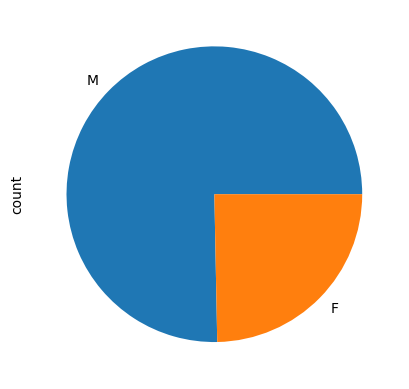

In [14]:
data['Gender'].value_counts().plot.pie()

<Axes: ylabel='count'>

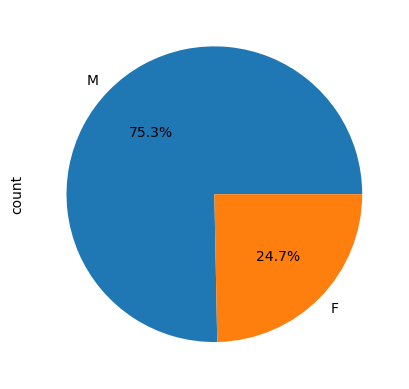

In [15]:
data['Gender'].value_counts().plot.pie(autopct='%1.1f%%')

Gender : The purchase is made mostly by male (75.3%) compared to female(24.7%)


<Axes: xlabel='Age', ylabel='count'>

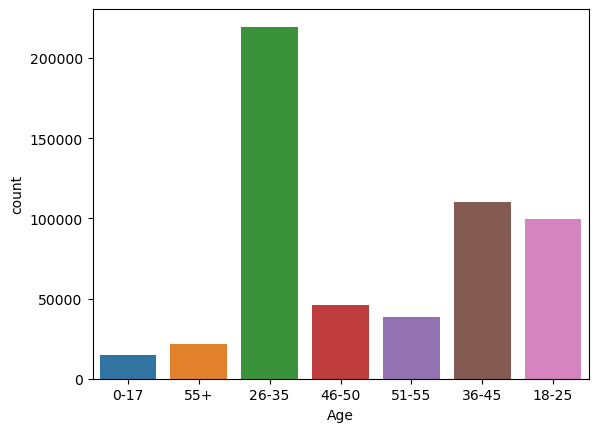

In [16]:
sns.countplot(x='Age',data=data)

Age: Maximum buyers belong to age grp "26-35" and least is "0-17" age group
There may be are products which are not allowed to be sold to "underage"

In [17]:
#Each age group how many percentage of the purchase has been made?
data['Age'].value_counts(normalize=True)*100

Age
26-35    39.919974
36-45    19.999891
18-25    18.117760
46-50     8.308246
51-55     6.999316
55+       3.909335
0-17      2.745479
Name: proportion, dtype: float64

<Axes: ylabel='proportion'>

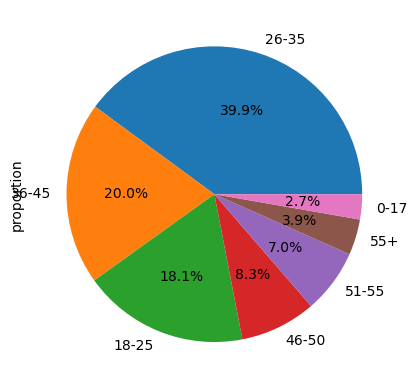

In [18]:
 data['Age'].value_counts(normalize=True).plot.pie(autopct='%1.1f%%')

In [19]:
data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [20]:
data['Marital_Status'].value_counts(normalize=True)*100

Marital_Status
0    59.034701
1    40.965299
Name: proportion, dtype: float64

# Representing in BAR chart

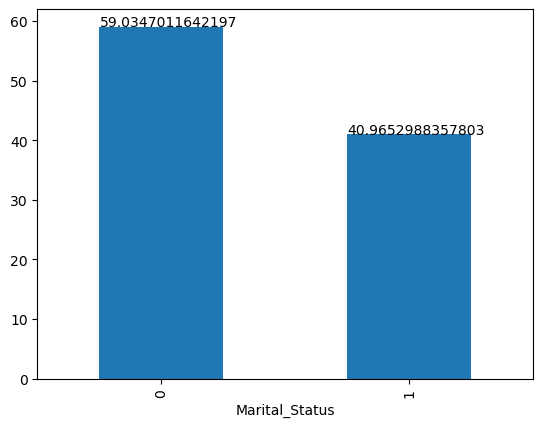

In [21]:
ax=(data['Marital_Status'].value_counts(normalize=True)*100).plot(kind='bar')
for p in ax.patches:
    ax.annotate(str(p.get_height()),(p.get_x()*1.0005,p.get_height()*1.0005))    

   # Pie chart representation

<Axes: ylabel='proportion'>

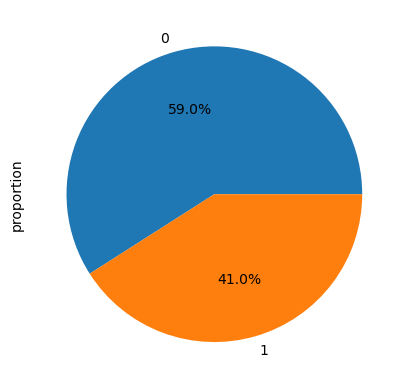

In [22]:
data['Marital_Status'].value_counts(normalize=True).plot.pie(autopct='%1.1f%%')

<Axes: xlabel='Product_Category_1', ylabel='count'>

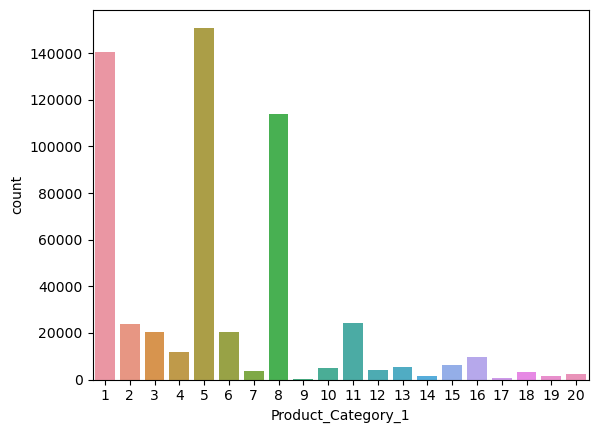

In [23]:
sns.countplot(x='Product_Category_1',data=data)

Above graph showing products in index format

<Axes: xlabel='Product_Category_1', ylabel='count'>

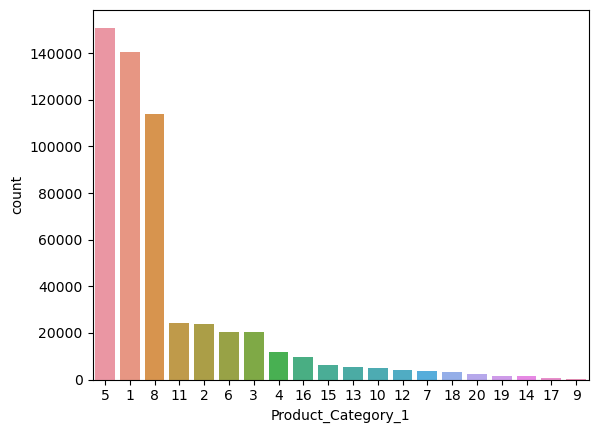

In [24]:
#Showing the top to least products in order
sns.countplot(x='Product_Category_1',data=data, order=data['Product_Category_1'].value_counts().index)

Product_Category_1 : Top three products are (5,1,8) and least three products are (14,17,9)

<Axes: >

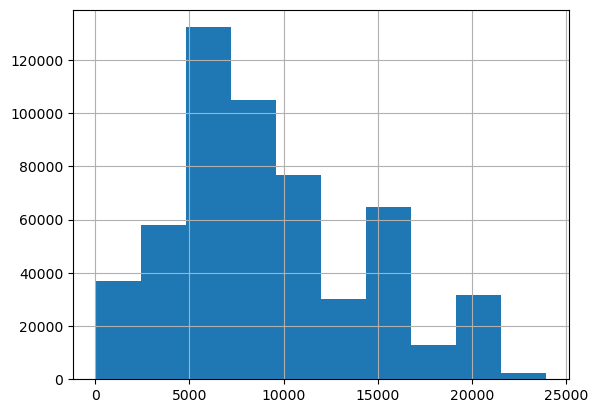

In [25]:
#Dependent variable/target = Purchase
#Independent variable = other than target
data['Purchase'].hist()

purchase :
    Max purchase from 5k-9k around more than 1-lakh purchases
    between 22k-25k amount there are least purchases

In [26]:
#bi-variate 

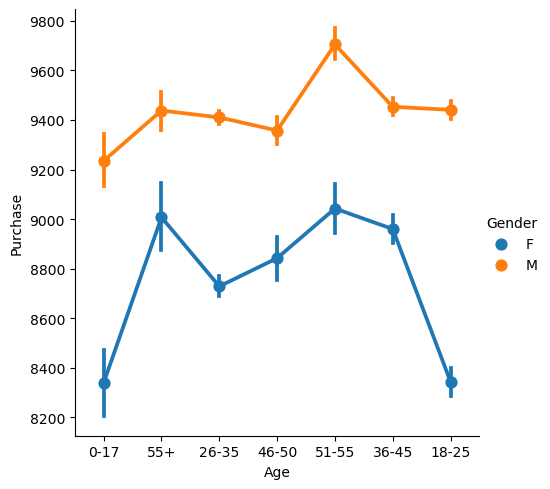

In [27]:
sns.catplot(x='Age',y='Purchase',data=data, kind='point',hue='Gender')

In [28]:
data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [29]:
data['City_Category'].nunique()

3

In [30]:
data['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

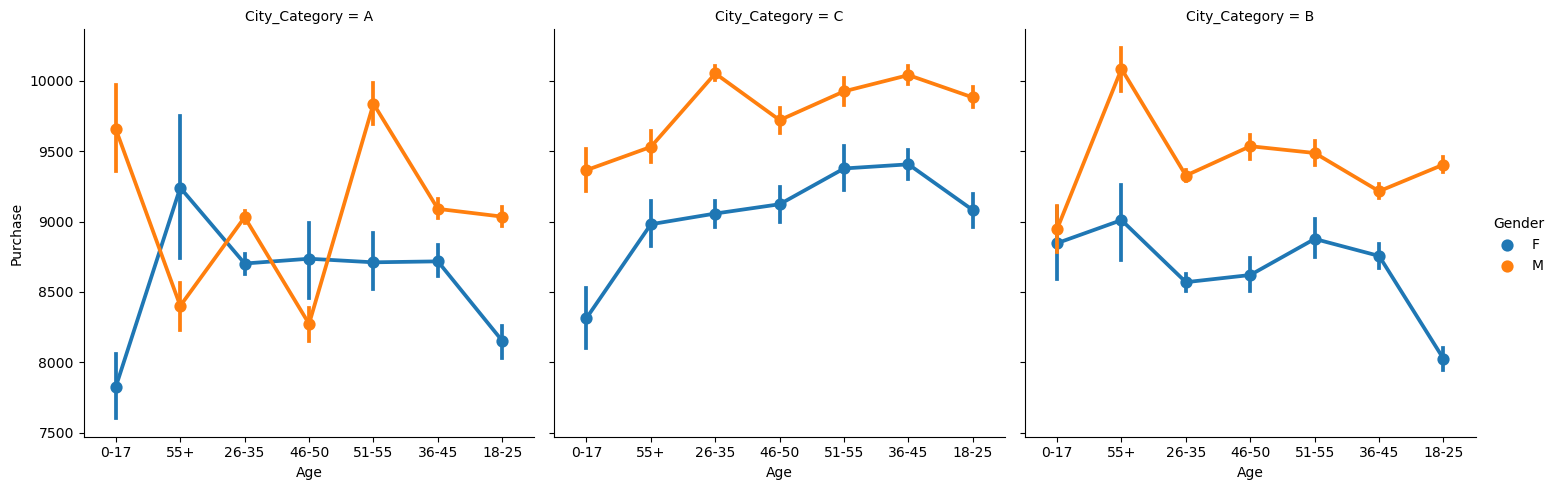

In [31]:
sns.catplot(x='Age',y='Purchase',data=data, kind='point',hue='Gender',col='City_Category')

In [32]:
data.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               17
Product_Category_3               15
Purchase                      18105
dtype: int64

In [33]:
#unique values of cols <25 unique values
for i in data.columns:
    if data[i].nunique() < 25:
        print(data[i].unique())
        

['F' 'M']
['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']
[10 16 15  7 20  9  1 12 17  0  3  4 11  8 19  2 18  5 14 13  6]
['A' 'C' 'B']
['2' '4+' '3' '1' '0']
[0 1]
[ 3  1 12  8  5  4  2  6 14 11 13 15  7 16 18 10 17  9 20 19]
[nan  6. 14.  2.  8. 15. 16. 11.  5.  3.  4. 12.  9. 10. 17. 13.  7. 18.]
[nan 14. 17.  5.  4. 16. 15.  8.  9. 13.  6. 12.  3. 18. 11. 10.]


In [34]:
#unique values of cols <25 unique values
for i in data.columns:
    if data[i].nunique() < 25:
        print(i,' --> ',data[i].unique(), '\n')

Gender  -->  ['F' 'M'] 

Age  -->  ['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25'] 

Occupation  -->  [10 16 15  7 20  9  1 12 17  0  3  4 11  8 19  2 18  5 14 13  6] 

City_Category  -->  ['A' 'C' 'B'] 

Stay_In_Current_City_Years  -->  ['2' '4+' '3' '1' '0'] 

Marital_Status  -->  [0 1] 

Product_Category_1  -->  [ 3  1 12  8  5  4  2  6 14 11 13 15  7 16 18 10 17  9 20 19] 

Product_Category_2  -->  [nan  6. 14.  2.  8. 15. 16. 11.  5.  3.  4. 12.  9. 10. 17. 13.  7. 18.] 

Product_Category_3  -->  [nan 14. 17.  5.  4. 16. 15.  8.  9. 13.  6. 12.  3. 18. 11. 10.] 



In [35]:
#unique values of cols <25 unique values
#Multiple statements
for i in data.columns:
    if data[i].nunique() < 25:
        print(i,'(', data[i].nunique(),')--> ',data[i].unique(), '\n')

Gender ( 2 )-->  ['F' 'M'] 

Age ( 7 )-->  ['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25'] 

Occupation ( 21 )-->  [10 16 15  7 20  9  1 12 17  0  3  4 11  8 19  2 18  5 14 13  6] 

City_Category ( 3 )-->  ['A' 'C' 'B'] 

Stay_In_Current_City_Years ( 5 )-->  ['2' '4+' '3' '1' '0'] 

Marital_Status ( 2 )-->  [0 1] 

Product_Category_1 ( 20 )-->  [ 3  1 12  8  5  4  2  6 14 11 13 15  7 16 18 10 17  9 20 19] 

Product_Category_2 ( 17 )-->  [nan  6. 14.  2.  8. 15. 16. 11.  5.  3.  4. 12.  9. 10. 17. 13.  7. 18.] 

Product_Category_3 ( 15 )-->  [nan 14. 17.  5.  4. 16. 15.  8.  9. 13.  6. 12.  3. 18. 11. 10.] 



In [36]:
#Single statement of comprehension
[print(i,'(', data[i].nunique(),')--> ',data[i].unique(), '\n')if data[i].nunique() < 25 else  None for i in data.columns]

Gender ( 2 )-->  ['F' 'M'] 

Age ( 7 )-->  ['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25'] 

Occupation ( 21 )-->  [10 16 15  7 20  9  1 12 17  0  3  4 11  8 19  2 18  5 14 13  6] 

City_Category ( 3 )-->  ['A' 'C' 'B'] 

Stay_In_Current_City_Years ( 5 )-->  ['2' '4+' '3' '1' '0'] 

Marital_Status ( 2 )-->  [0 1] 

Product_Category_1 ( 20 )-->  [ 3  1 12  8  5  4  2  6 14 11 13 15  7 16 18 10 17  9 20 19] 

Product_Category_2 ( 17 )-->  [nan  6. 14.  2.  8. 15. 16. 11.  5.  3.  4. 12.  9. 10. 17. 13.  7. 18.] 

Product_Category_3 ( 15 )-->  [nan 14. 17.  5.  4. 16. 15.  8.  9. 13.  6. 12.  3. 18. 11. 10.] 



[None, None, None, None, None, None, None, None, None, None, None, None]

# Using Pipeline

segregate the catogory and number columns

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [38]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [39]:
target_col=['Purchase']
ignore_cols=['User_ID','Product_ID']

In [40]:
cat_cols = data.drop(columns = ['User_ID','Product_ID','Purchase']).select_dtypes('object').columns
print(cat_cols)

Index(['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years'], dtype='object')


In [41]:
cat_cols = data.drop(columns = target_col+ignore_cols).select_dtypes('object').columns
print(cat_cols)

Index(['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years'], dtype='object')


In [42]:
num_cols = data.drop(columns = ignore_cols+target_col).select_dtypes('int','float').columns
print(num_cols)

Index(['Occupation', 'Marital_Status', 'Product_Category_1'], dtype='object')


In [43]:
#Check null values
data.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [44]:
data.isna().sum().values/data.shape[0]*100

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , 31.56664267,
       69.67265865,  0.        ])

In [45]:
data[['Product_Category_2','Product_Category_3']].isna().sum().values/data.shape[0]*100

array([31.56664267, 69.67265865])

In [46]:
#category = one hot encodeing
#numeric = perform scaling -every numeric values having diff kind of range so from scaling method so we bring it to the same range so the model will digest the data 
#missing values = imputation

In [47]:
#Necessary Libraries
from sklearn.preprocessing import OneHotEncoder #Encoding
from sklearn.preprocessing import MinMaxScaler #Scaling
from sklearn.impute import SimpleImputer #Imputation

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [48]:
#Define the pipeline

#for category columns do 1.OHE
cat_encode = Pipeline(steps=[
    ('ohe',OneHotEncoder(handle_unknown='ignore'))
])

#for number columns do 1.impute , 2.scaling
num_encode = Pipeline(steps=[
    ('simp',SimpleImputer(strategy='most_frequent')),
    ('scale',MinMaxScaler())
])

In [49]:
#Map which pipeline to work on what column types

full_encode = ColumnTransformer(transformers=[
    ('cat_prep',cat_encode,cat_cols),
    ('num_prep',num_encode,num_cols)
])


In [50]:
pipe = Pipeline([
    ('preprocess',full_encode)
])

In [51]:
pipe

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat_prep',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years'], dtype='object')),
                                                 ('num_prep',
                                                  Pipeline(steps=[('simp',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('scale',
                                                                   MinMaxScaler())]),
                                                  Index(['Occupation', 'Marital_Status', 'Product_Category_1'], dtype='object'))]))])

In [52]:
pipe.fit(data.drop(columns=ignore_cols+target_col))

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat_prep',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years'], dtype='object')),
                                                 ('num_prep',
                                                  Pipeline(steps=[('simp',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('scale',
                                                                   MinMaxScaler())]),
                                                  Index(['Occupation', 'Marital_Status', 'Product_Category_1'], dtype='object'))]))])

In [53]:
data.head(1)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370


In [54]:
in_new_data = data.drop(columns=ignore_cols+target_col).head(1)
in_new_data 

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,F,0-17,10,A,2,0,3,NaN,NaN


In [55]:
out_new_data = pipe.transform(in_new_data)
out_new_data = pd.DataFrame(out_new_data)
out_new_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.5,0.0,0.105263
